In [78]:
import numpy as np

In [79]:
class LinearRegression:
    def __init__(self, X, y, lr=0.001, benchmark=0.0001, batch_size=64):
        self.X = X
        self.y = y
        self.lr = lr
        self.benchmark = benchmark
        self.batch_size = batch_size
        
        self.w = np.random.randn(self.X.shape[1])
    
    def predict(self, X):
        return np.dot(X, self.w)
    
    def error(self, X, y):
        return abs((self.predict(X) - y));
    
    def calc_grad(self, X, y):
        return np.dot(X.T, (y - self.predict(X)))
    
    def update_weights(self, grad):
        self.w += self.lr * grad
    
    def train(self):
        prev_error = self.error(self.X, self.y).mean()
        
        cnt_err_bigger_than_prev = 0;
        
        while(True):
            
            indx = np.random.permutation(self.X.shape[0])
            
            X_prem = self.X[indx]
            y_prem = self.y[indx]
            
            for i in range(0, self.batch_size, 1):
                X_batch = X_prem[i:i+self.batch_size]
                y_batch = y_prem[i:i+self.batch_size]
                grad = self.calc_grad(X_batch, y_batch)
                self.update_weights(grad)
            
            err = self.error(self.X, self.y).mean()
            
            # print("p err: ", prev_error)
            # print("err: ", err)
            
            if(prev_error - err < self.benchmark and prev_error > err):
                prev_error = err
            else:
                cnt_err_bigger_than_prev += 1
                
            if(cnt_err_bigger_than_prev > 10):
                break;   
                
        print("Min Error: ", prev_error);
        print("Weights: ", self.w)

In [80]:
from sklearn.datasets import make_regression
X, y, coef = make_regression(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

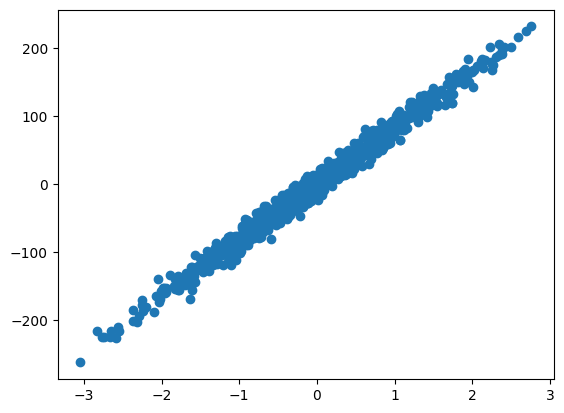

In [81]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [83]:
model = LinearRegression(X=X, y=y, lr=0.001, benchmark=0.01)

In [84]:
model.train();

Min Error:  64.92262345614148
Weights:  [80.42318443]


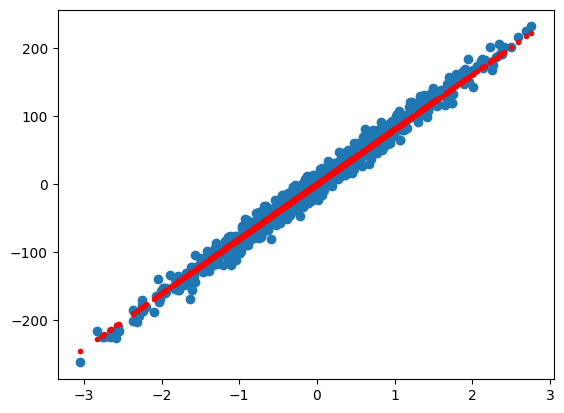

In [85]:
pred = model.predict(X)

plt.scatter(X, y)
plt.scatter(X, pred, marker='.', color='red')